!pip install vega_datasets

!pip install --upgrade pip

In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vega_datasets import data

In [5]:
# load seattle temperature data

seattle_temps = data.seattle_temps()
seattle_temps.head(3)

,date,temp
0,2010-01-01 00:00:00,39.4
1,2010-01-01 01:00:00,39.2
2,2010-01-01 02:00:00,39.0


In [6]:
# review data

seattle_temps.shape

(8759, 2)

In [7]:
seattle_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8759 non-null   datetime64[ns]
 1   temp    8759 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


<AxesSubplot: >

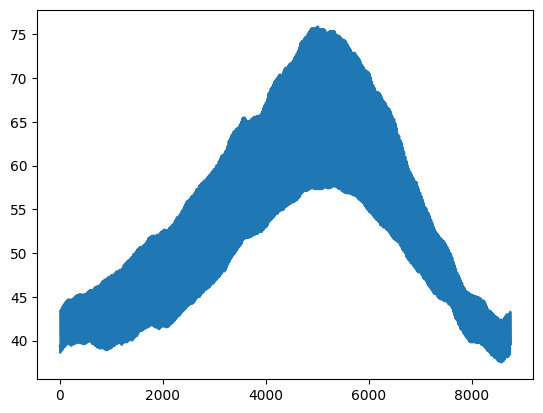

In [8]:
# create a simple plot

seattle_temps.temp.plot()

In [9]:
seattle_temps.tail(3)

,date,temp
8756,2010-12-31 21:00:00,40.2
8757,2010-12-31 22:00:00,40.0
8758,2010-12-31 23:00:00,39.6


In [10]:
seattle_temps.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [11]:
# prep data with time series

seattle_temps.date = seattle_temps.date.dt.date 
seattle_temps.head(3)

,date,temp
0,2010-01-01,39.4
1,2010-01-01,39.2
2,2010-01-01,39.0


In [12]:
# calculate min and max temps

df = seattle_temps.groupby('date').agg(['min', 'max'])
df.head(10)

temp      
             min   max
date                  
2010-01-01  38.6  43.5
2010-01-02  38.8  43.8
2010-01-03  39.0  44.0
2010-01-04  39.2  44.2
2010-01-05  39.3  44.4
2010-01-06  39.5  44.6
2010-01-07  39.6  44.7
2010-01-08  39.6  44.7
2010-01-09  39.5  44.7
2010-01-10  39.4  44.7

In [14]:
df.shape

(365, 2)

In [15]:
# drop level 0 column and set date to index

df.columns = df.columns.droplevel(0)
df.head(3)

,min,max
date,,
2010-01-01,38.6,43.5
2010-01-02,38.8,43.8
2010-01-03,39.0,44.0


In [16]:
df.reset_index(level = 0, inplace = True)
df.head(3)

,date,min,max
0,2010-01-01,38.6,43.5
1,2010-01-02,38.8,43.8
2,2010-01-03,39.0,44.0


<AxesSubplot: >

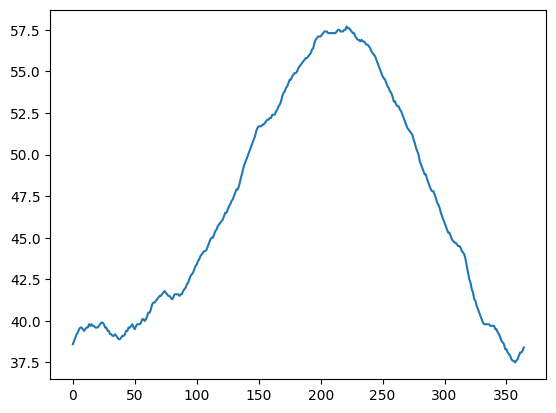

In [17]:
# create a single plot

df['min'].plot()

<AxesSubplot: >

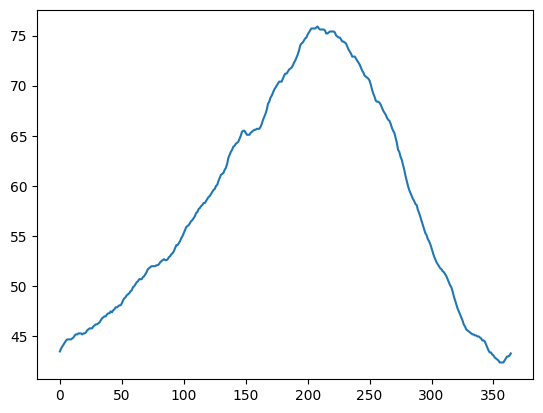

In [18]:
df['max'].plot()

<AxesSubplot: xlabel='date'>

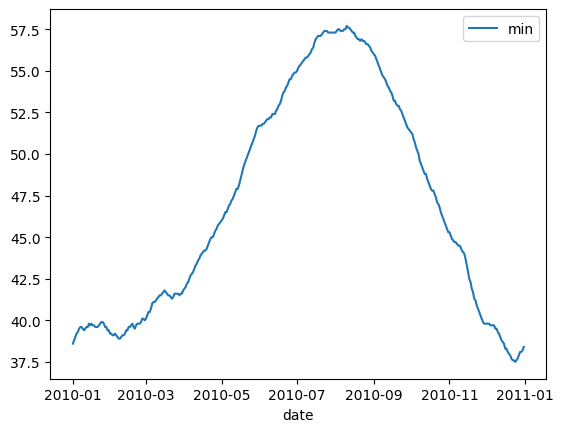

In [19]:
# create time series plot

df.plot(x = 'date', y = 'min')

Text(0.5, 1.0, 'Minimum temperature of Seattle')

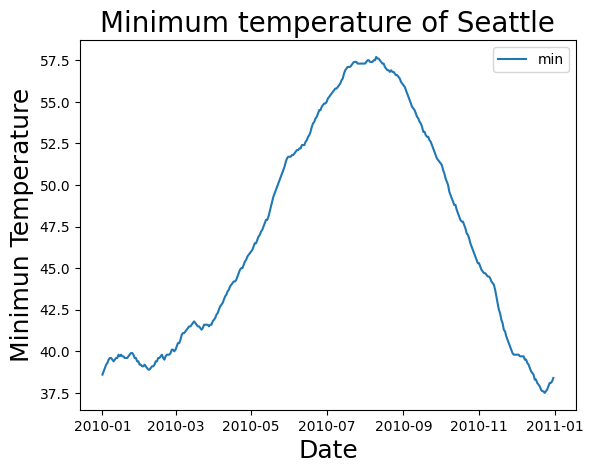

In [20]:
# create time series plot

df.plot(x = 'date', y = 'min')
plt.xlabel('Date', size = 18)
plt.ylabel('Minimun Temperature', size = 18)
plt.title('Minimum temperature of Seattle', size = 20)

Text(0.5, 1.0, 'Minimum temperature of Seattle')

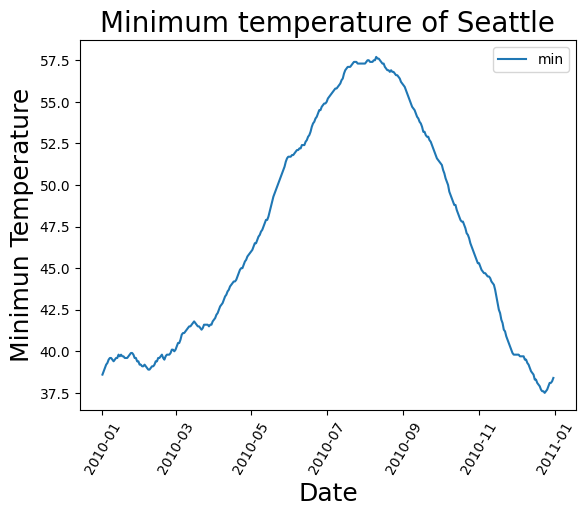

In [21]:
# create time series plot

df.plot(x = 'date', y = 'min', rot = 60) # rotate x data
plt.xlabel('Date', size = 18)
plt.ylabel('Minimun Temperature', size = 18)
plt.title('Minimum temperature of Seattle', size = 20)

Text(0.5, 1.0, 'Minimum temperature of Seattle')

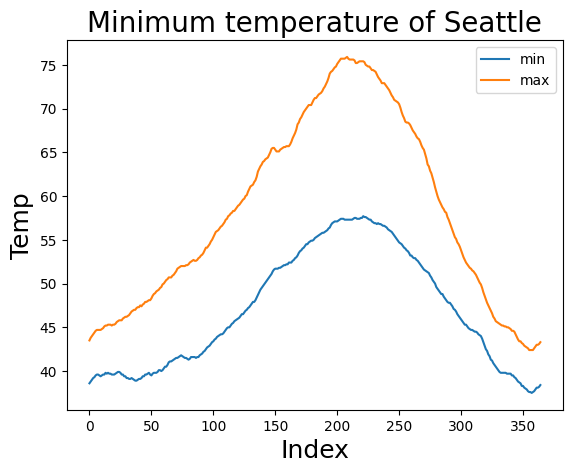

In [22]:
# create default line plot using dataframe

df.plot()
plt.xlabel('Index', size = 18)
plt.ylabel('Temp', size = 18)
plt.title('Minimum temperature of Seattle', size = 20)

Text(0.5, 1.0, 'Minimum temperature of Seattle')

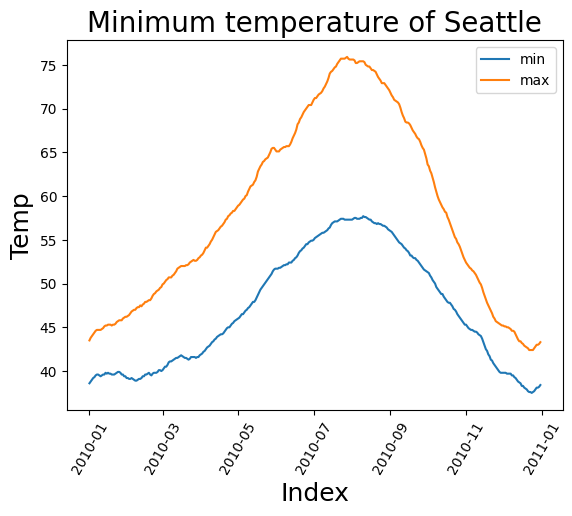

In [24]:
# create default line plot using dataframe

df.set_index('date').plot(rot = 60) # rotate x data
plt.xlabel('Index', size = 18) 
plt.ylabel('Temp', size = 18)
plt.title('Minimum temperature of Seattle', size = 20)